## Mission 4: Predicting House Price with Multiple Linear Regression

Introduction
In this mission, you will be working with a real estate dataset to perform Exploratory Data Analysis (EDA) and create a Multiple Linear Regression (MLR) model to predict the Price of a house based on various features such as Square Feet, Number of Bedrooms, Number of Bathrooms, and other factors.

The dataset includes the following columns:

**Square_Feet:** The total area of the house in square feet.

**Num_Bedrooms:** The number of bedrooms in the house.

**Num_Bathrooms:** The number of bathrooms in the house.

**Num_Floors:** The number of floors in the house.

**Garage_Size:** The size of the garage.

**Location_Score:** A score representing the desirability of the location.

**Distance_to_Center:** The distance (in km) to the city center.

**Price:** The price of the house (target variable).


## Step 1: Loading and Understanding the Data

Start by loading the dataset into a Pandas DataFrame. Inspect the first few rows of the dataset and understand its structure.

Tasks:

Task 1.1. The data is stored in Azure Blob Storage. To connect to Azure Blob Storage, we will use a connection string that contains authentication details such as the account name and account key. See the credentials below.


Task 1.2. Load the dataset into a Pandas DataFrame from the CSV file stored in Blob Storage. Name the dataframe as df_house_price

Task 1.3. Display the first few rows.

Task 1.4. Check the data types and null values.

In [2]:
#Task 1.1. The data is stored in Azure Blob Storage. To connect to Azure Blob Storage, we will use a connection string that contains authentication details such as the account name and account key. See the credentials below.
connect_str = "DefaultEndpointsProtocol=https;AccountName=level5data;AccountKey=cWgxWhPELQdrW0sIgA/eXM8/k9+xdaELukN8sg5imfhm4wVIJQFmypEph/Ppy500v41mYT+iCBbC+AStsfHbAQ==;EndpointSuffix=core.windows.net"
container_name = "businesscases"
blob_name = "house_sales_prediction.csv"

In [3]:
#Task 1.2. Load the dataset into a Pandas DataFrame from the CSV file stored in Blob Storage. Name the dataframe as df_house_price
import pandas as pd
from azure.storage.blob import BlobServiceClient
from io import StringIO

blob_service_client = BlobServiceClient.from_connection_string(connect_str)
container_client = blob_service_client.get_container_client(container_name)
blob_client = container_client.get_blob_client(blob_name)

blob_data = blob_client.download_blob()
csv_content = blob_data.readall().decode('utf-8')

In [4]:
#Task 1.3. Display the first few rows.
df_house_price = pd.read_csv(StringIO(csv_content))
display(df_house_price.head())

In [5]:
#Task 1.4. Check the data types 
print(df_house_price.dtypes)
#checking null values
print(df_house_price.isnull().sum())

Square_Feet           float64
Num_Bedrooms            int64
Num_Bathrooms           int64
Num_Floors              int64
Garage_Size             int64
Location_Score        float64
Distance_to_Center    float64
Price                 float64
dtype: object
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64


## Step 2: Exploratory Data Analysis (EDA)

In this step, you will perform some basic EDA to understand the relationships between the features and the target variable (Price). This includes visualising the data, checking for correlations, and identifying patterns.

Tasks:

Task 2.1. Check summary statistics for the dataset.

Task 2.2. Visualise the relationship between Square Feet and Price using a scatter plot.

Task 2.3.  Visualise the distribution of the Price variable using a histogram.

Task 2.4.  Compute and visualize the correlation matrix between the features.

In [6]:
#Task 2.1. Check summary statistics for the dataset.
print(df_house_price.describe())

       Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Garage_Size  \
count   500.000000    500.000000     500.000000  500.000000   500.000000   
mean    174.640428      2.958000       1.976000    1.964000    30.174000   
std      74.672102      1.440968       0.820225    0.802491    11.582575   
min      51.265396      1.000000       1.000000    1.000000    10.000000   
25%     110.319923      2.000000       1.000000    1.000000    20.000000   
50%     178.290937      3.000000       2.000000    2.000000    30.000000   
75%     239.031220      4.000000       3.000000    3.000000    41.000000   
max     298.241199      5.000000       3.000000    3.000000    49.000000   

       Location_Score  Distance_to_Center          Price  
count      500.000000          500.000000     500.000000  
mean         5.164410           10.469641  582209.629531  
std          2.853489            5.588197  122273.390347  
min          0.004428            0.062818  276892.470100  
25%          2.76065

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 7.2 MB/s eta 0:00:00ta 0:00:01


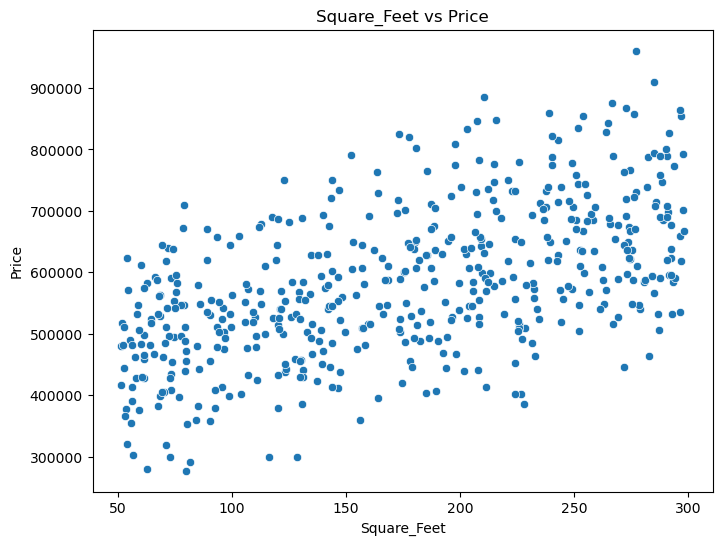

In [7]:
#Task 2.2. Visualise the relationship between Square Feet and Price using a scatter plot.
!pip install seaborn matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Square_Feet', y='Price', data=df_house_price)
plt.title('Square_Feet vs Price')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

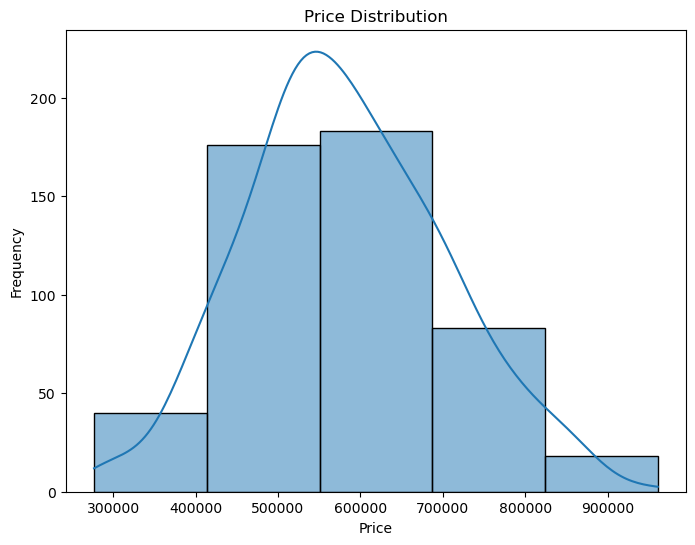

In [8]:
#Task 2.3. Visualise the distribution of the Price variable using a histogram.
plt.figure(figsize=(8, 6))
sns.histplot(df_house_price['Price'], bins=5, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

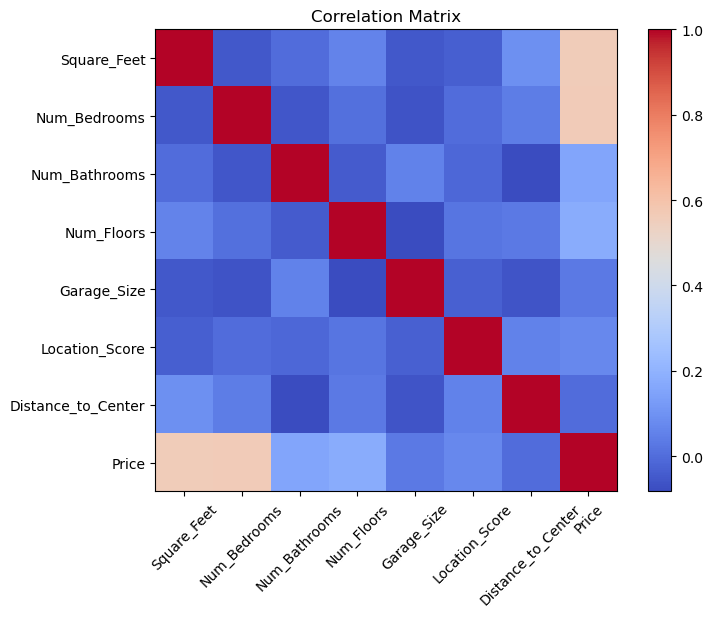

In [9]:
#Task 2.4. Compute and visualize the correlation matrix between the features.
numeric_df = df_house_price.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

## Step 3: Creating a Multiple Linear Regression (MLR) Model

In this step, we will use Multiple Linear Regression to predict the Price of the house based on the features. We will split the data into a training set and a testing set, fit the model, and evaluate its performance.

Task 3.1: Split the Data into Features and Target
Split the dataset into features (X) and target variable (y).

Task 3.2: Split the Data into Training and Testing Sets
Split the data into training (80%) and testing (20%) sets.

Task 3.3: Train the Multiple Linear Regression Model
Train the Multiple Linear Regression (MLR) model using the training data.

Task 3.4: Visualise the Predicted vs Actual Prices
Create a scatter plot comparing the actual prices and predicted prices for the test set.

Task 3.5: Evaluate the Model
Evaluate the model using Root Mean Squared Error (RMSE) and interpret the results.

In [10]:
#Task 3.1: Split the Data into Features and Target Split the dataset into features (X) and target variable (y).
X = df_house_price[['Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors', 'Garage_Size', 'Location_Score', 'Distance_to_Center']]
y = df_house_price['Price']

In [11]:
#Task 3.2: Split the Data into Training and Testing Sets Split the data into training (80%) and testing (20%) sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
#Task 3.3: Train the Multiple Linear Regression Model Train the Multiple Linear Regression (MLR) model using the training data.
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

🏃 View run purple_hook_q2gs724w at: https://2d0fc43f898c4b4fa153ed44d311104c.pbidedicated.windows.net/webapi/capacities/2d0fc43f-898c-4b4f-a153-ed44d311104c/workloads/ML/ML/Automatic/workspaceid/de819e79-41a1-46e6-adb9-50a738ca19cb/#/experiments/2237dc36-720d-4de2-bc6f-90cef8237462/runs/1af85c8b-34c8-4d2b-8484-5bfd9b1e7d53
🧪 View experiment at: https://2d0fc43f898c4b4fa153ed44d311104c.pbidedicated.windows.net/webapi/capacities/2d0fc43f-898c-4b4f-a153-ed44d311104c/workloads/ML/ML/Automatic/workspaceid/de819e79-41a1-46e6-adb9-50a738ca19cb/#/experiments/2237dc36-720d-4de2-bc6f-90cef8237462


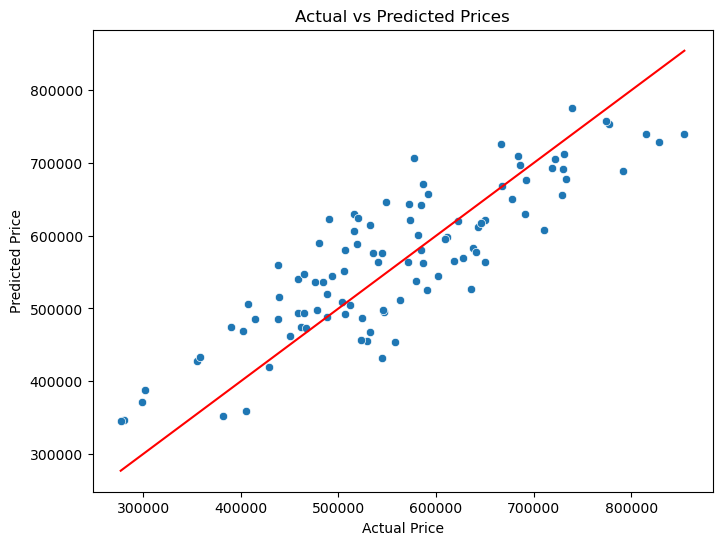

In [13]:
#Task 3.4: Visualise the Predicted vs Actual Prices Create a scatter plot comparing the actual prices and predicted prices for the test set.
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

In [14]:
#Task 3.5: Evaluate the Model Evaluate the model using Root Mean Squared Error (RMSE) and interpret the results.
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Multiple Linear Regression RMSE: {rmse}")

Multiple Linear Regression RMSE: 63952.37599755184


## Step 4: Compare with Random Forest Regressor

Task 4.1: Train a Random Forest Model
Train a Random Forest Regressor model and evaluate its performance.

Task 4.2: Visualise Actual vs Predicted Prices for Random Forest
Create a scatter plot comparing the actual prices and predicted prices for the Random Forest model.

Task 4.3: Model Comparison
Compare the RMSE values of both the MLR and Random Forest models. Which model performs better?

In [15]:
#Task 4.1: Train a Random Forest Model Train a Random Forest Regressor model and evaluate its performance.
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Random Forest RMSE: {rmse_rf}")

🏃 View run witty_cabbage_msp8vysw at: https://2d0fc43f898c4b4fa153ed44d311104c.pbidedicated.windows.net/webapi/capacities/2d0fc43f-898c-4b4f-a153-ed44d311104c/workloads/ML/ML/Automatic/workspaceid/de819e79-41a1-46e6-adb9-50a738ca19cb/#/experiments/2237dc36-720d-4de2-bc6f-90cef8237462/runs/80998881-a50d-46af-8740-ebd679392e62
🧪 View experiment at: https://2d0fc43f898c4b4fa153ed44d311104c.pbidedicated.windows.net/webapi/capacities/2d0fc43f-898c-4b4f-a153-ed44d311104c/workloads/ML/ML/Automatic/workspaceid/de819e79-41a1-46e6-adb9-50a738ca19cb/#/experiments/2237dc36-720d-4de2-bc6f-90cef8237462


Random Forest RMSE: 71733.35944826744


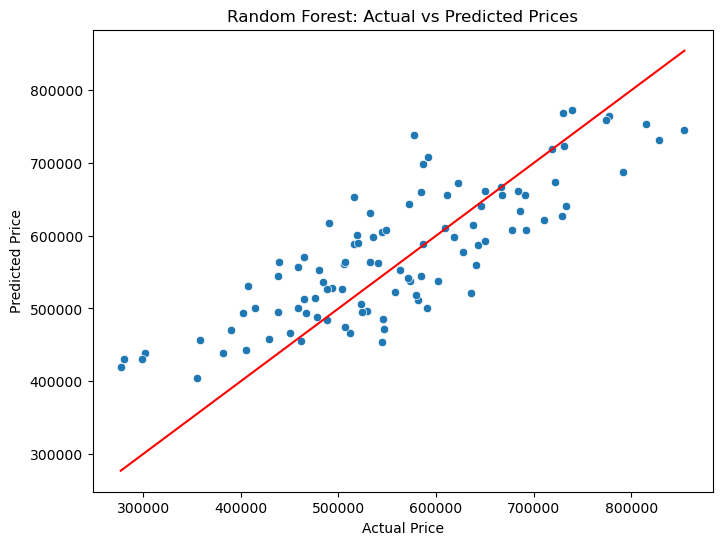

In [16]:
#Task 4.2: Visualise Actual vs Predicted Prices for Random Forest Create a scatter plot comparing the actual prices and predicted prices for the Random Forest model.
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()

In [17]:
#Task 4.3: Model Comparison Compare the RMSE values of both the MLR and Random Forest models. Which model performs better?
if rmse_rf < rmse:
    print("Random Forest performs better")
elif rmse_rf > rmse:
    print("Multiple Linear Regression performs better")
else:
    print("Both models perform equally")

Multiple Linear Regression performs better


## Step 5: Conclusion and Insights

Task 5.1: Insights and Recommendations

Based on the RMSE and visualisations, summarise which model performs better and why.

Discuss any improvements that could be made to both models.

In [18]:
# Based on the RMSE, the Multiple Linear Regression model performs better than the Random Forest model because its RMSE value is lower, indicating more accurate predictions on average.
# To improve the Random Forest model, increase the number of trees (n_estimators) from 100 to 1000 to reduce the RMSE and improve prediction accuracy.
# To improve the Multiple Linear Regression Model, the data can be cleansed and any outliers should be removed.